In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [5]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


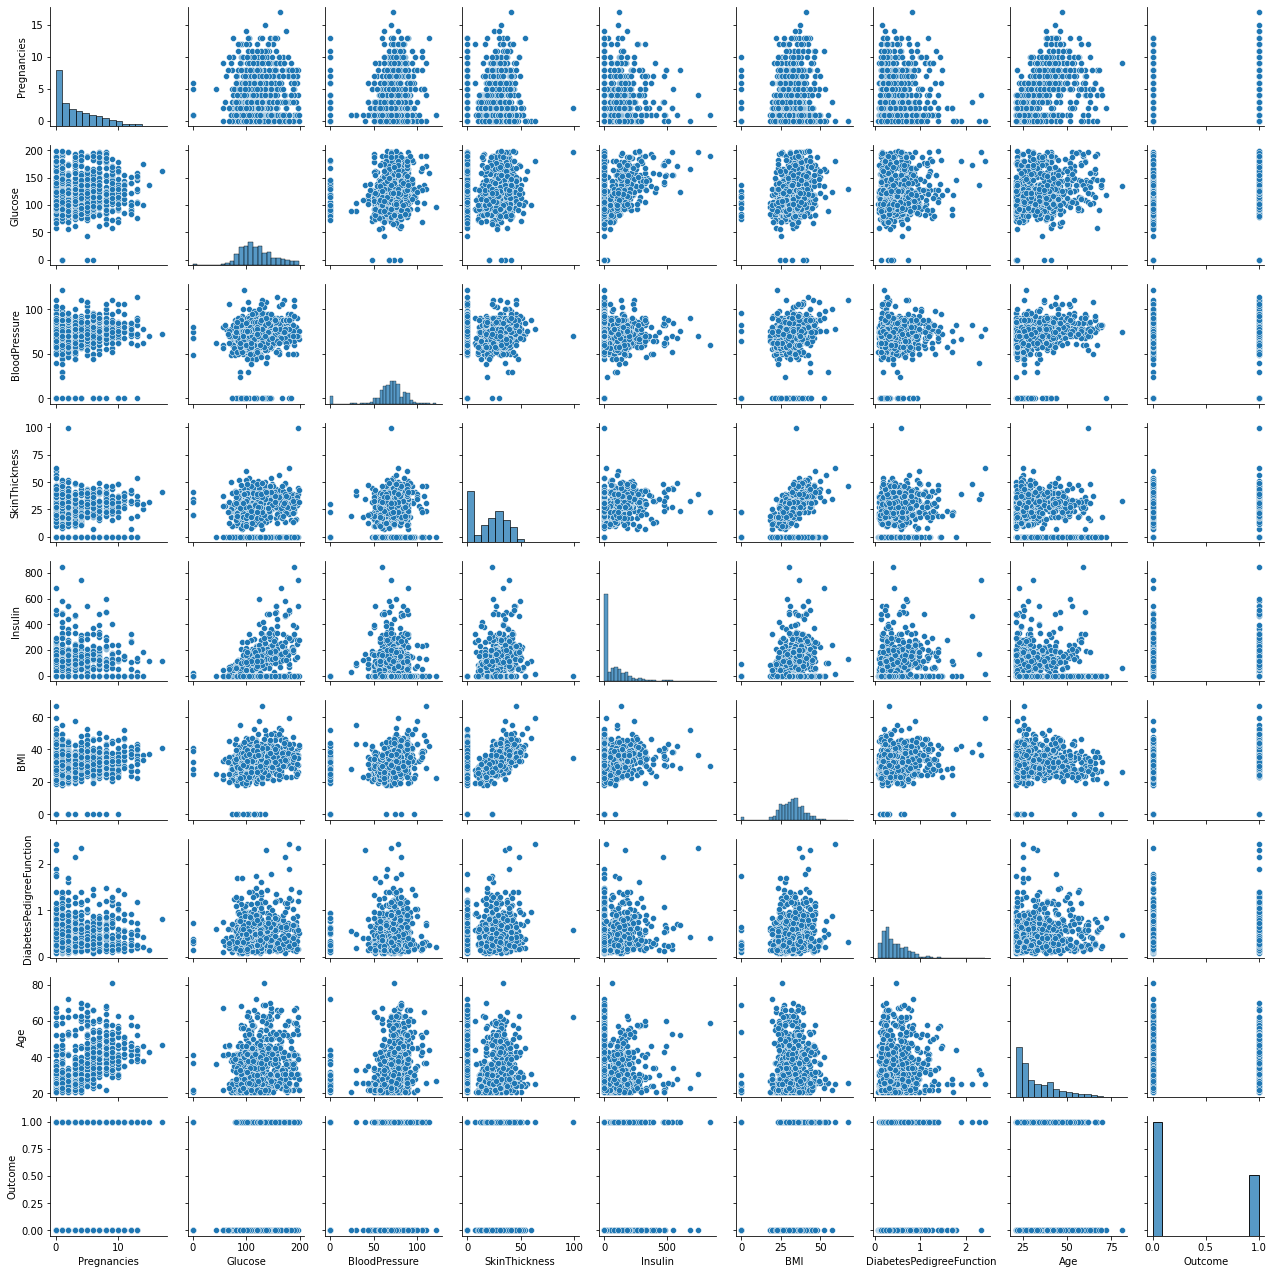

In [7]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
        'Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome' ]
sns.pairplot(df[cols], size=2.0)

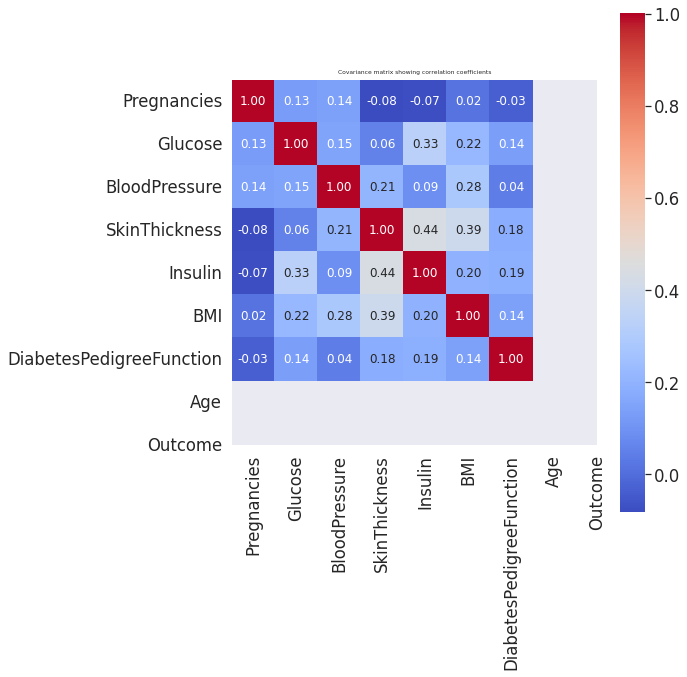

In [8]:
from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 6)
plt.tight_layout()
plt.show()

In [9]:
X = np.array(df['Age'])
Y= np.array(df['BloodPressure'])

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [11]:
X = X_train

In [14]:
Y = Y_train

In [26]:
import matplotlib.pyplot as plt 
# Building the model
m = 0
c = 0
MSE = []

L = 0.001  # The learning Rate
epochs = 20  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = np.array(m*X) + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))
    error = (1/n) * sum((Y - Y_pred)**2)
    MSE.append(error) # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)


-8489.83699811731 -225.17321942470892


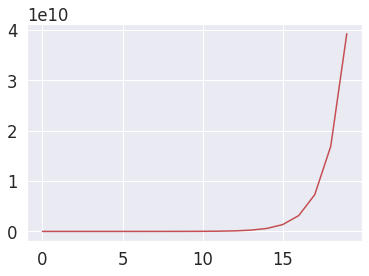

In [27]:
plt.plot(list(range(epochs)), MSE, '-r')